###  Importing Libraries and dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.tsa.api as smt

In [2]:
# Importing the dataset
bike = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## General Information about the dataset : 

Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type(dteday).

There seems to be some fields that are categorical in nature, but in integer/float type.

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [8]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Finding
There are no missing / Null values

## Duplicate Check

In [9]:
dup_check = bike[bike.duplicated()]

In [10]:
dup_check.shape

(0, 16)

### Insights 

Hence we can conclude that there were zero duplicate values in the dataset. 

## Data Cleaning

Checking value_counts() for entire dataframe. 

This will help to identify the levels in each of the columns

In [11]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [12]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False))

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30

### Insights 
There are no Unknown values in the entire dataset.

# Removing redundant & unwanted columns

Based on the observations on the data and the data dictionary, the following variables can be removed from further analysis:

1. **instant** : Contains index

2. **dteday** : This has the date and since we already have seperate columns for year and month

3.  **casual & registered** : These columns in a way are used to derive our target variables and hence cannot be used

In [13]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [15]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit' and hence convert their datatypes first

In [16]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [17]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [18]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [19]:
bike_new.shape

(730, 30)

## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 

In [20]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 100)


- Verify the shape of the dataframes after split:

In [22]:
df_train.shape

(510, 30)

In [23]:
df_test.shape

(219, 30)

# EXPLORATORY DATA ANALYSIS


- We need to  perform the EDA on TRAINING (df_train) Dataset.

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

In [25]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [26]:
# Checking the datatypes of each variable

df_train.columns.to_series().groupby(df_train.dtypes).groups

{uint8: ['season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'], int64: ['yr', 'holiday', 'workingday', 'cnt'], float64: ['temp', 'atemp', 'hum', 'windspeed']}

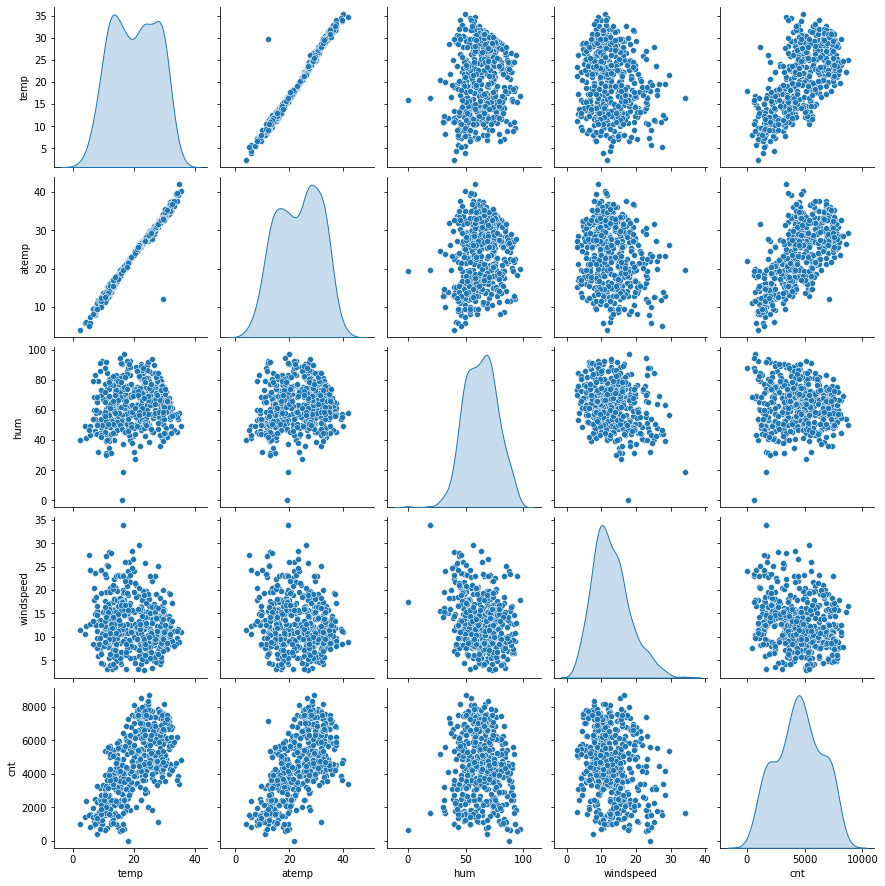

In [27]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a linear relation between 'temp','atemp' and 'cnt' 

In [28]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

## Visualising Catagorical Variables

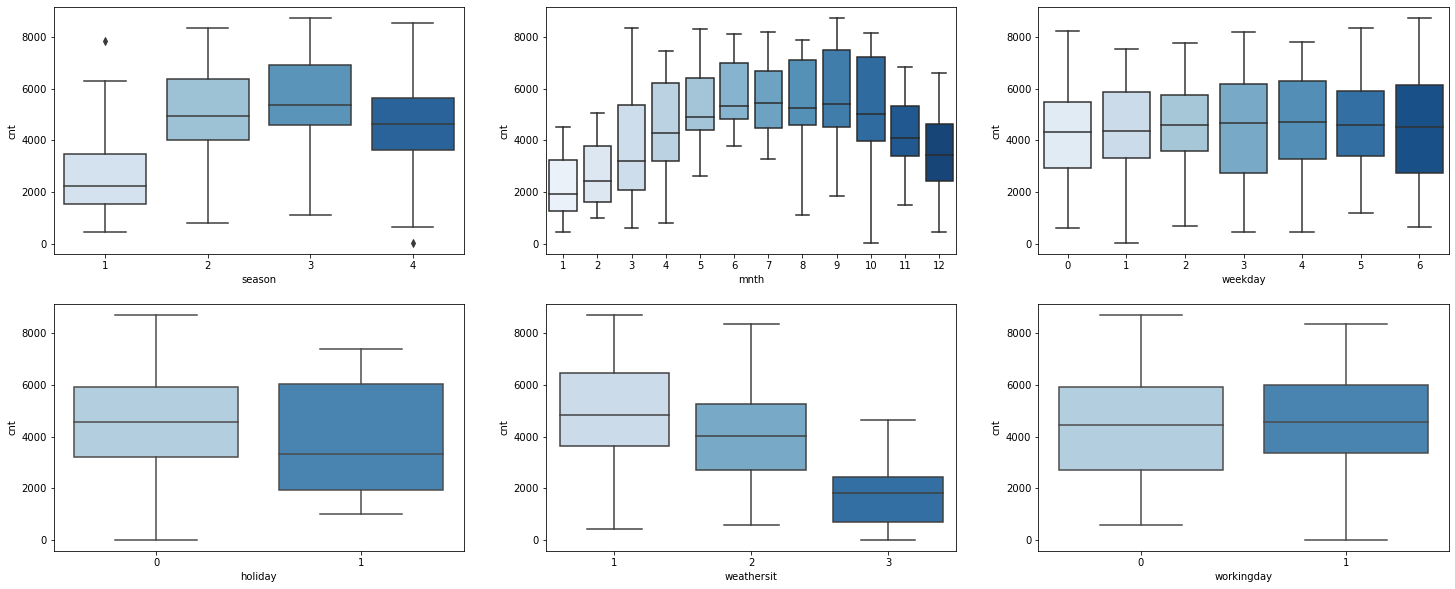

In [29]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike, palette='Blues')
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike, palette='Blues')
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike, palette='Blues')
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike, palette='Blues')
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike, palette='Blues')
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike, palette='Blues')
plt.show()

### Insights

We used Box plot to study the effect these 6 categorical variables had on the dependent variable (‘cnt’) . 

The inference are: 
- **season**: Most of the bike booking were happening in season3 with a median of over 5000 booking. 
- **mnth**: A trend can be observed with number of booking increasing from January till September with some downward trend after it towards the end of the year. 
- **weekday**: Not a lot of significant difference can be observed in each level.
- **holiday**: Most of the booking happening when it's not a holiday.
- **weathersit**: This variable can play a significant role in predicting the target as there's a difference in the median of each level with different ranges.
- **workingday**: Not a lot of significant differnce was observed in the levels.

## Correlation Matrix

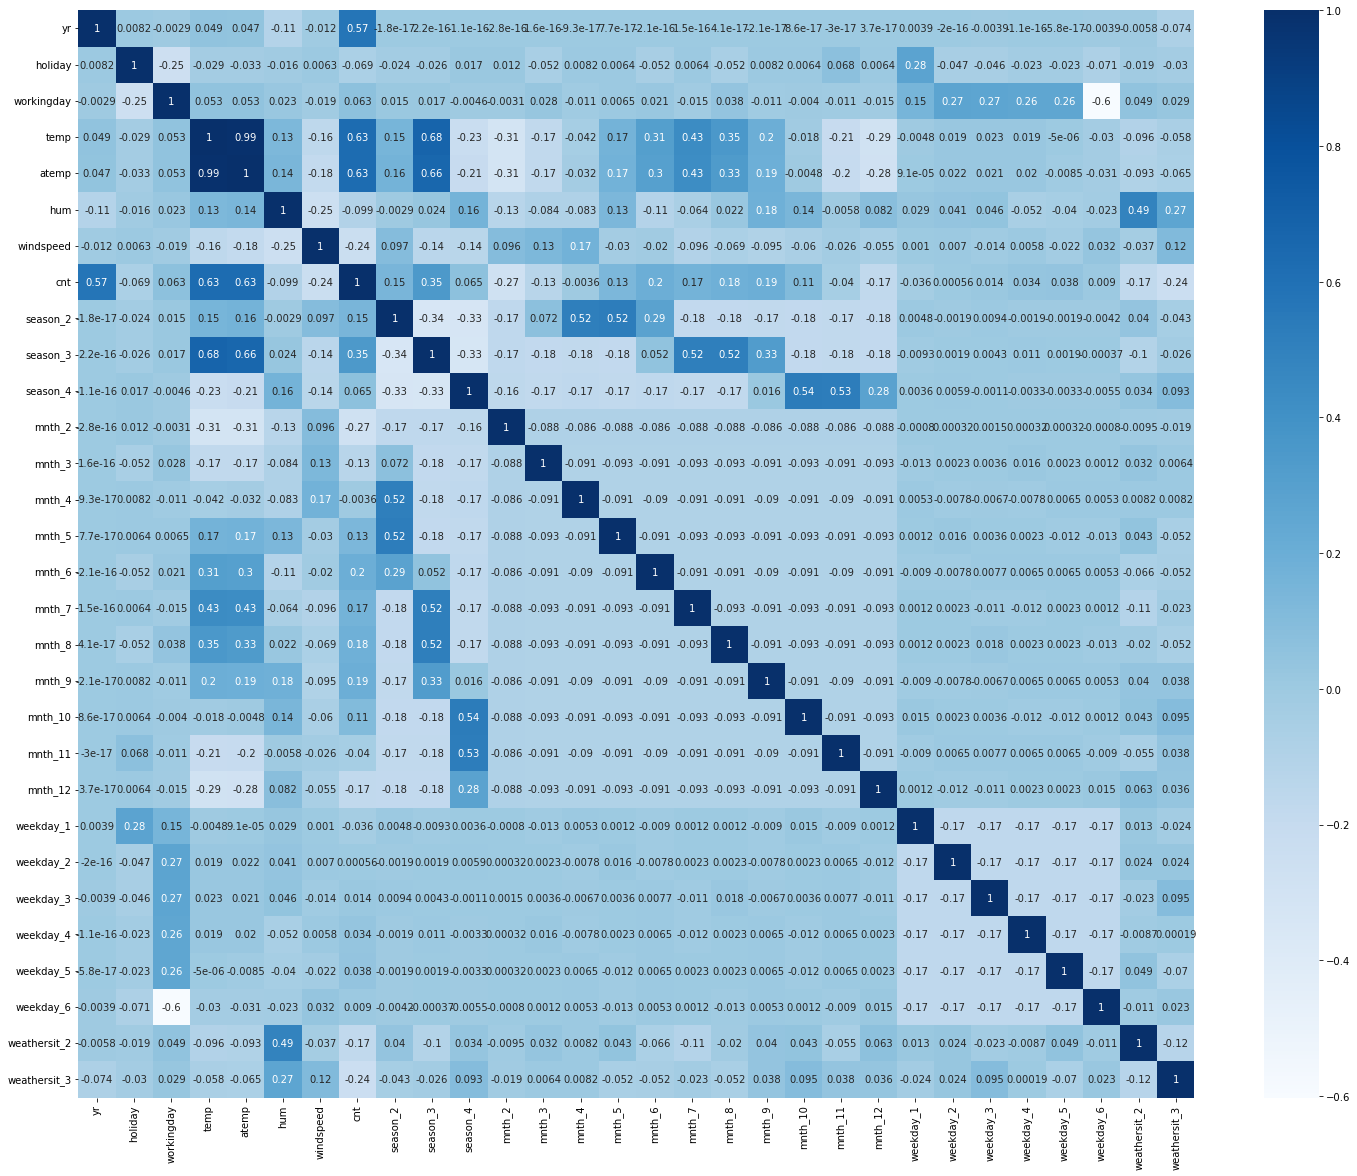

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="Blues")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - temp and atemp are almost perfected correlated and hence one of them can be droppend.
 - We can also observe some variables that are highly correlated with the target and hence can be powerful predictors for the model.

# RESCALING THE FEATURES

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [34]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [35]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [37]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**

In [39]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 20)             
# running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', False, 4),
 ('mnth_6', False, 6),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [43]:
X_train.columns[~rfe.support_]

Index(['season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12'],
      dtype='object')

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF Check

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weekday_3,inf
2,workingday,inf
16,weekday_5,inf
1,holiday,inf
15,weekday_4,inf
12,weekday_1,inf
13,weekday_2,inf
4,atemp,371.92
3,temp,369.37
5,hum,17.01


In [46]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [47]:
# Check the parameters obtained

lr1.params

const           0.191766
yr              0.229757
holiday        -0.048300
workingday      0.045062
temp            0.497510
atemp           0.034470
hum            -0.166598
windspeed      -0.183687
season_2        0.104090
season_4        0.135024
mnth_8          0.056295
mnth_9          0.125134
mnth_10         0.041353
weekday_1      -0.010676
weekday_2      -0.008450
weekday_3       0.004281
weekday_4       0.001163
weekday_5       0.010444
weekday_6       0.053116
weathersit_2   -0.059142
weathersit_3   -0.249341
dtype: float64

In [48]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.67e-187
Time:                        21:54:11   Log-Likelihood:                 520.55
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1918      0.029      6.634   

## Model 2

- Removing the variable 'holiday' based on its infinte VIF which indicated it is perfectly multicolinear with respect to other varaibles

In [49]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

### VIF Check

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,371.92
2,temp,369.37
1,workingday,30.24
4,hum,17.01
13,weekday_3,8.98
12,weekday_2,7.61
14,weekday_4,7.36
15,weekday_5,7.23
11,weekday_1,6.97
5,windspeed,3.97


In [51]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [52]:
# Check the parameters obtained

lr2.params

const           0.191766
yr              0.229757
workingday      0.093362
temp            0.497510
atemp           0.034470
hum            -0.166598
windspeed      -0.183687
season_2        0.104090
season_4        0.135024
mnth_8          0.056295
mnth_9          0.125134
mnth_10         0.041353
weekday_1      -0.058976
weekday_2      -0.056750
weekday_3      -0.044019
weekday_4      -0.047137
weekday_5      -0.037856
weekday_6       0.053116
weathersit_2   -0.059142
weathersit_3   -0.249341
dtype: float64

In [53]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.67e-187
Time:                        21:54:11   Log-Likelihood:                 520.55
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1918      0.029      6.634   

## Model 3

 - Removing the variable 'atemp' based on its Very High 'VIF' value.

In [54]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)

### VIF Check

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,30.16
3,hum,16.62
2,temp,10.03
12,weekday_3,8.97
11,weekday_2,7.60
13,weekday_4,7.36
14,weekday_5,7.19
10,weekday_1,6.97
4,windspeed,3.83
6,season_4,2.27


In [56]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [57]:
lr3.params

const           0.192178
yr              0.229737
workingday      0.093709
temp            0.529713
hum            -0.166072
windspeed      -0.184911
season_2        0.104336
season_4        0.135292
mnth_8          0.055717
mnth_9          0.125046
mnth_10         0.041468
weekday_1      -0.059199
weekday_2      -0.057060
weekday_3      -0.044394
weekday_4      -0.047387
weekday_5      -0.038463
weekday_6       0.053120
weathersit_2   -0.059198
weathersit_3   -0.249905
dtype: float64

In [58]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.01e-188
Time:                        21:54:11   Log-Likelihood:                 520.51
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1922      0.029      6.665   

## Model 4

- Removing the variable 'workingday' based on its Very High 'VIF' value.

In [59]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### VIF Check

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,16.61
1,temp,10.02
3,windspeed,3.82
5,season_4,2.27
15,weathersit_2,2.15
0,yr,2.03
11,weekday_3,1.97
9,weekday_1,1.91
14,weekday_6,1.90
4,season_2,1.83


In [61]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [62]:
# Check the parameters obtained

lr4.params

const           0.190842
yr              0.230504
temp            0.532386
hum            -0.166831
windspeed      -0.187226
season_2        0.106123
season_4        0.134131
mnth_8          0.057270
mnth_9          0.122686
mnth_10         0.043034
weekday_1       0.022204
weekday_2       0.036373
weekday_3       0.048927
weekday_4       0.043565
weekday_5       0.053478
weekday_6       0.053050
weathersit_2   -0.057565
weathersit_3   -0.246019
dtype: float64

In [63]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     157.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.21e-186
Time:                        21:54:11   Log-Likelihood:                 513.99
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     492   BIC:                            -915.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1908      0.029      6.542   

## Model 5

- Removing the variable 'hum' based on its Very High 'VIF' value.

In [64]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.39
2,windspeed,3.59
0,yr,2.03
4,season_4,2.02
3,season_2,1.82
10,weekday_3,1.81
13,weekday_6,1.77
8,weekday_1,1.75
9,weekday_2,1.68
11,weekday_4,1.66


In [66]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [67]:
# Check the parameters obtained

lr5.params

const           0.092145
yr              0.234327
temp            0.512512
windspeed      -0.155258
season_2        0.103228
season_4        0.126217
mnth_8          0.055529
mnth_9          0.116181
mnth_10         0.039246
weekday_1       0.023621
weekday_2       0.038582
weekday_3       0.051219
weekday_4       0.047713
weekday_5       0.058869
weekday_6       0.058079
weathersit_2   -0.084369
weathersit_3   -0.290736
dtype: float64

In [68]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.44e-183
Time:                        21:54:11   Log-Likelihood:                 503.94
No. Observations:                 510   AIC:                            -973.9
Df Residuals:                     493   BIC:                            -901.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0921      0.019      4.777   

## Model 6

- Removing the variable 'weekday_1' based on its High 'p-value'.
- We are not removing 'temp' even though it has slightly high 'VIF' since we know temprature plays a significant role in predicting our taget and would like to factor it in

In [69]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

### VIF Check

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.81
2,windspeed,3.34
0,yr,2.01
4,season_4,1.97
3,season_2,1.82
7,mnth_10,1.61
5,mnth_8,1.59
13,weathersit_2,1.52
9,weekday_3,1.47
12,weekday_6,1.45


In [71]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [72]:
# Check the parameters obtained

lr6.params

const           0.104092
yr              0.234816
temp            0.511786
windspeed      -0.155393
season_2        0.103553
season_4        0.126407
mnth_8          0.056060
mnth_9          0.116882
mnth_10         0.038753
weekday_2       0.026462
weekday_3       0.039014
weekday_4       0.035551
weekday_5       0.046713
weekday_6       0.045923
weathersit_2   -0.083893
weathersit_3   -0.289620
dtype: float64

In [73]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.72e-184
Time:                        21:54:11   Log-Likelihood:                 502.66
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     494   BIC:                            -905.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1041      0.018      5.862   

## Model 7

- Removing the variable 'weekday_2' based on its High 'p-value'.

In [74]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

### VIF Check

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.47
2,windspeed,3.26
0,yr,2.00
4,season_4,1.96
3,season_2,1.82
7,mnth_10,1.61
5,mnth_8,1.59
12,weathersit_2,1.51
6,mnth_9,1.34
8,weekday_3,1.34


In [76]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [77]:
# Check the parameters obtained

lr7.params

const           0.111295
yr              0.234394
temp            0.513652
windspeed      -0.155048
season_2        0.103717
season_4        0.126294
mnth_8          0.056381
mnth_9          0.116852
mnth_10         0.038210
weekday_3       0.030772
weekday_4       0.027343
weekday_5       0.038436
weekday_6       0.037740
weathersit_2   -0.083570
weathersit_3   -0.289723
dtype: float64

In [78]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.81e-184
Time:                        21:54:11   Log-Likelihood:                 500.69
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     495   BIC:                            -907.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1113      0.017      6.388   

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. We will consider this as our final model.

# Final Model Interpretation

### Insights
- From the lr7 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**
    

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 181.2
- Prob (F-statistic): 1.81e-184

The F-Statistics value of 181.2 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## The equation of best fitted model based on model lr7:

const* 0.111295 + yr* 0.234394 + temp* 0.513652 - windspeed* 0.155048 + season_2* 0.103717 + season_4* 0.126294 + mnth_8* 0.056381 + mnth_9* 0.116852 + mnth_10* 0.038210 + weekday_3* 0.030772 + weekday_4* 0.027343 + weekday_5* 0.038436 + weekday_6* 0.037740 - weathersit_2* 0.083570 - weathersit_3* 0.289723

### Interpretation
All the independent variables with positive value of coefficient will have a positive impact on the sales of the bikes and all the independent variables with negative value of coefficient will have a negative impact on the sales of the bikes.

# ASSUMPTIONS 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [79]:
y_train_pred = lr7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

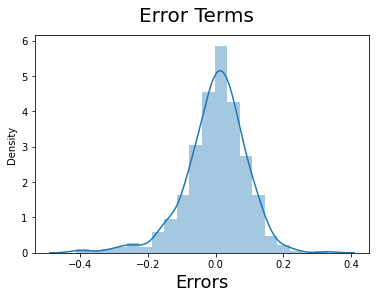

In [80]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

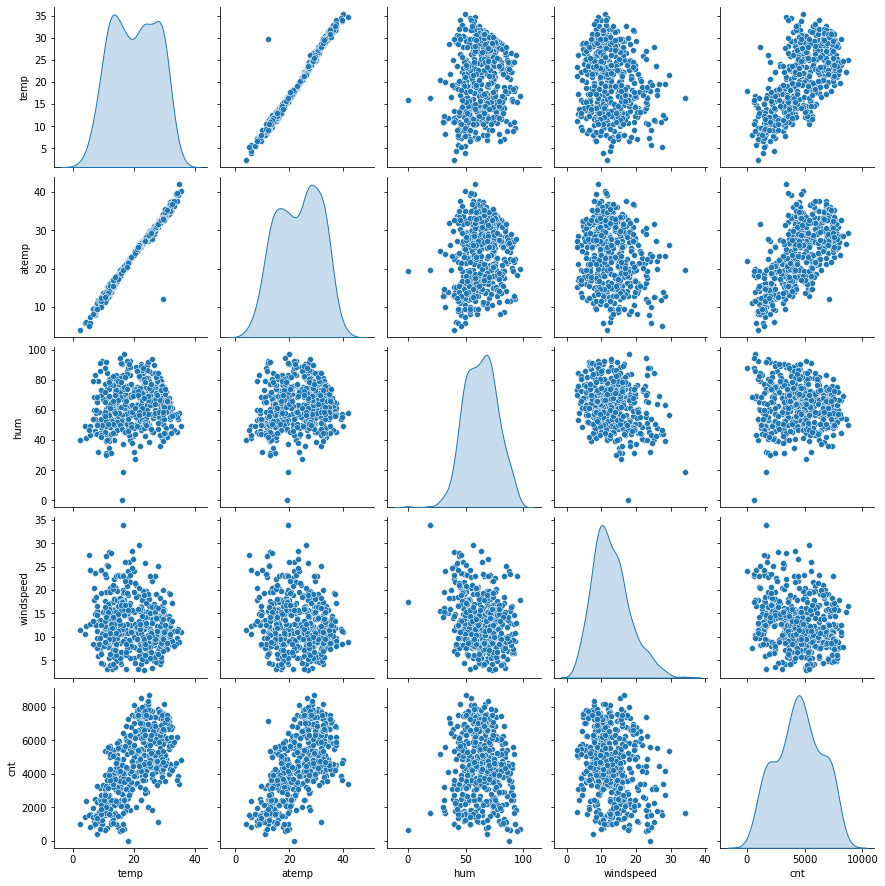

In [81]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Insight
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.47
2,windspeed,3.26
0,yr,2.00
4,season_4,1.96
3,season_2,1.82
7,mnth_10,1.61
5,mnth_8,1.59
12,weathersit_2,1.51
6,mnth_9,1.34
8,weekday_3,1.34


## Insight

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5 or around 5.

## There is no autocorrelation among the residuals

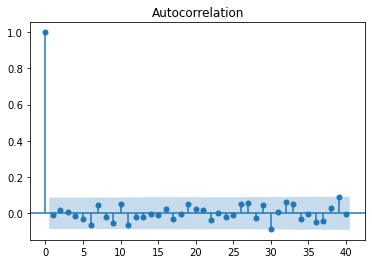

In [83]:
acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()

## Insights

- There is no autocorrelation among the error terms

## There is no heteroscedasticity

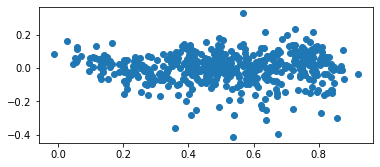

In [84]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_train_pred, res)

## Insights

- the error is constant along the values of the dependent variable that is there is a constant variance of the error terms and it is homoscedastic in nature

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr7)

### Applying the scaling on the test sets

In [85]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [86]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [88]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [89]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_8        219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   mnth_10       219 non-null    uint8  
 9   weekday_3     219 non-null    uint8  
 10  weekday_4     219 non-null    uint8  
 11  weekday_5     219 non-null    uint8  
 12  weekday_6     219 non-null    uint8  
 13  weathersit_2  219 non-null    uint8  
 14  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(11)
memory usage: 10.9 KB


In [90]:
# Making predictions using the final model (lr6)

y_pred = lr7.predict(X_test_lm7)

# MODEL EVALUATION

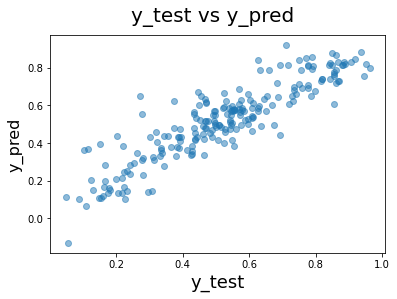

In [91]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8029614132819037

## Adjusted R^2 Value for TEST

In [93]:
# We already have the value of R^2 (calculated in above step)

r2=0.8029614132819037

In [94]:
# Get the shape of X_test
X_test.shape

(219, 14)

In [95]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7894391573306618

# Final Result Comparison

- Train R^2 :0.837
- Train Adjusted R^2 :0.832
- Test R^2 :0.802
- Test Adjusted R^2 :0.789
- This seems to be a really decent model that can very well 'Generalize' various datasets.

# FINAL REPORT

const* 0.111295 + yr* 0.234394 + temp* 0.513652 - windspeed* 0.155048 + season_2* 0.103717 + season_4* 0.126294 + mnth_8* 0.056381 + mnth_9* 0.116852 + mnth_10* 0.038210 + weekday_3* 0.030772 + weekday_4* 0.027343 + weekday_5* 0.038436 + weekday_6* 0.037740 - weathersit_2* 0.083570 - weathersit_3* 0.289723

### As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of '0.5136' indicated that a unit increase in temp variable increases the bike hire numbers by 0.5136 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of '-0.2897' indicated that w.r.t to Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2897 units.
- **Year (yr)** - A coefficient value of '0.2343' indicated that a unit increase in yr variable increases the bike hire numbers by 0.2343 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **windspeed:** - A coefficient value of '-0.1550' indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1550 units. 
- **season_4:** - A coefficient value of '0.1262' indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1262 units. 


 #### NOTE: 
 - The details of weathersit_3 and season4 
 - **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
 - **season4:** winter
